In [1]:
import numpy as np
import matplotlib.pyplot as plt
Ypred = np.zeros(2)

In [2]:
print(Ypred)

[0. 0.]


In [3]:
x = [[1, 1],
     [2, 2]]
a = np.array(x)
y = [[2, 2]]
b = np.array(y)
dist = np.sum(np.abs(a-b),axis = 1)
min_index = np.argmin(dist)
print(min_index)

1


In [4]:
def L_i(x, y, W):
    delta = 1.0
    scores = W.dot(x)
    correct_class_score = scores[y]
    D = W.shape[0]
    loss_i = 0.0
    for j in xrange(D):
        if j == y:
            continue
        loss_i += max(0, score(D) - correct_class_score + delta)
    reture loss_i

SyntaxError: invalid syntax (<ipython-input-4-4bb6c66ce89c>, line 11)

In [ ]:
def L_i_vectorized(x, y, W):
    delta = 1.0
    scores = W.dot(x)
    margin = np.maximum(scores - scores[y] + delta)
    margin[y] = 0.0
    loss = np.sum(margin)
    return loss_i
    

In [ ]:
loss = 2.123457
print ('original loss: %f' % loss)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.zeros((3*2, 2))
print(x)

In [ ]:

x = np.zeros((3, 4))
y = np.ones((3, 4))

print(np.c_[x, y])

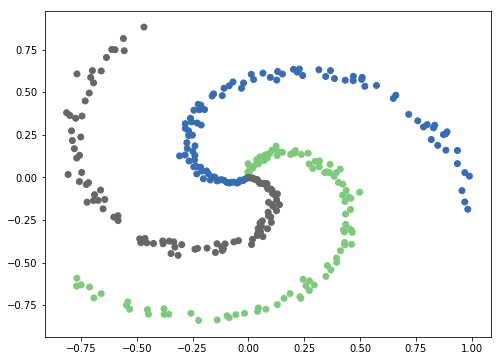

In [29]:
N = 100
D = 2
K = 3
X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.1
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['image.cmap'] = 'Accent'
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.show()

In [49]:
w = 0.01*np.random.randn(D, K)
b = np.zeros((1, K))
step_size = 1
reg = 0.001
num_example = X.shape[0]
for i in range(300):
    
    score = np.dot(X, w) + b
    exp_score = np.exp(score)
    prob = exp_score/np.sum(exp_score, axis=1, keepdims=True)
    correct_prob = -np.log(prob[range(num_example), y])
    data_loss = np.sum(correct_prob)/num_example
    reg_loss = 0.5*reg*np.sum(w*w)
    total_loss = data_loss + reg_loss
    if i%20 == 0:
        print('iteration %d: total loss: %0.4f' %(i, total_loss))
      
    dscore = prob 
    dscore[range(num_example), y] -= 1
    dscore /= num_example
    dw = np.dot(X.T, dscore)
    db = np.sum(dscore, axis=0, keepdims=True)
    dw += reg*w
    w -= step_size*dw
    b -= step_size*db


iteration 0: total loss: 1.0987
iteration 20: total loss: 0.8323
iteration 40: total loss: 0.7812
iteration 60: total loss: 0.7646
iteration 80: total loss: 0.7579
iteration 100: total loss: 0.7548
iteration 120: total loss: 0.7532
iteration 140: total loss: 0.7524
iteration 160: total loss: 0.7520
iteration 180: total loss: 0.7517
iteration 200: total loss: 0.7516
iteration 220: total loss: 0.7515
iteration 240: total loss: 0.7515
iteration 260: total loss: 0.7514
iteration 280: total loss: 0.7514


In [8]:
print(w)
score = np.dot(X, w) + b
predicted_class = np.argmax(score, axis=1)
print('training accuracy: %f' %(np.mean(predicted_class == y)))

[[ 1.25266658  1.1170765  -2.3816221 ]
 [-2.68138406  3.09195767 -0.41333684]]
training accuracy: 0.526667


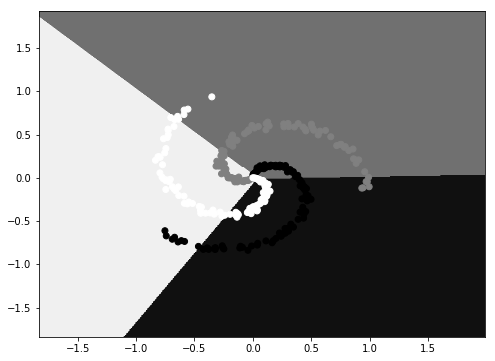

[[2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [9]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = np.dot(np.c_[xx.flatten(), yy.flatten()], w) + b
z = np.argmax(z, axis=1)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
print(z)

In [20]:
h = 100
w = 0.01*np.random.randn(D, h)
b = np.zeros((1, h))
w1 = 0.01*np.random.randn(h, K)
b1 = np.zeros((1, K))
for i in range(10000):
    hidden_layer = np.maximum(0, np.dot(X, w) + b)
    score = np.dot(hidden_layer, w1) + b1
    exp_score = np.exp(score)
    prob = exp_score/np.sum(exp_score, axis=1, keepdims=True)
    correct_logprob = -np.log(prob[range(num_example), y])
    data_loss = np.sum(correct_logprob)/num_example
    reg_loss = 0.5*reg*np.sum(w*w) + 0.5*reg*np.sum(w1*w1)
    loss = data_loss + reg_loss
    if i%1000 == 0:
        print('iteration: %d: loss %f' %(i, loss))
    dscore = prob
    dscore[range(num_example), y] -= 1
    dscore /= num_example
    dw1 = np.dot(hidden_layer.T, dscore)
    db1 = np.sum(dscore, axis=0, keepdims=True)
    dhidden = np.dot(dscore, w1.T)
    dhidden[hidden_layer <= 0] = 0
    dw = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    
    dw += reg*w
    dw1 += reg*w1
    
    w -= step_size*dw
    b -= step_size*db
    w1 -= step_size*dw1
    b1 -= step_size*db1
    
    
                              
    

iteration: 0: loss 1.098597
iteration: 1000: loss 0.286806
iteration: 2000: loss 0.263912
iteration: 3000: loss 0.244772
iteration: 4000: loss 0.239579
iteration: 5000: loss 0.237483
iteration: 6000: loss 0.236714
iteration: 7000: loss 0.236287
iteration: 8000: loss 0.235994
iteration: 9000: loss 0.235730


In [21]:
hidden_layer = np.maximum(0, np.dot(X, w) + b)
score = np.dot(hidden_layer, w1) + b1
predicted_class = np.argmax(score, axis=1)
print('training accuracy: %.4f' %(np.mean(predicted_class == y)))

training accuracy: 0.9867


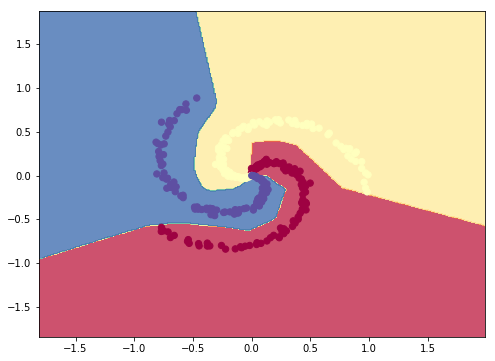

In [45]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max,h))
z = np.dot(np.maximum(0, np.dot(np.c_[xx.flatten(), yy.flatten()], w)
                      + b), w1) + b1
z = np.argmax(z, axis=1)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)